In [12]:
import cv2
import sys
import matplotlib.pyplot as plt

# SelectiveSearch only works with opencv-contrib-python
# Make sure no other opencv is installed

In [ ]:
#!pip uninstall opencv-python opencv-contrib-python
#!pip install opencv-contrib-python

In [2]:
def ss_config(ss, img, mode):
    ss.setBaseImage(img)

    if mode == 's':
        ss.switchToSingleStrategy()
    elif mode == 'f':
        ss.switchToSelectiveSearchFast()
    elif mode == 'q':
        ss.switchToSelectiveSearchQuality()
    else:
        print("Re-enter the mode. s or f or q")
        sys.exit(1)

In [3]:
def selective_search(img_path, mode='q'):
    # Initiate Selective Search
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    # Read image in color
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # Configure the mode and image
    ss_config(ss, img, mode)

    # Process Selective-Search
    bboxes = ss.process() # bboxes: listof [x, y, w, h]
    bboxes[:, 2] += bboxes[:, 0] # bboxes -> listof [x, y, x + w, h]
    bboxes[:, 3] += bboxes[:, 1] # bboxes -> listof [x, y, x + w, h + y]

    return bboxes

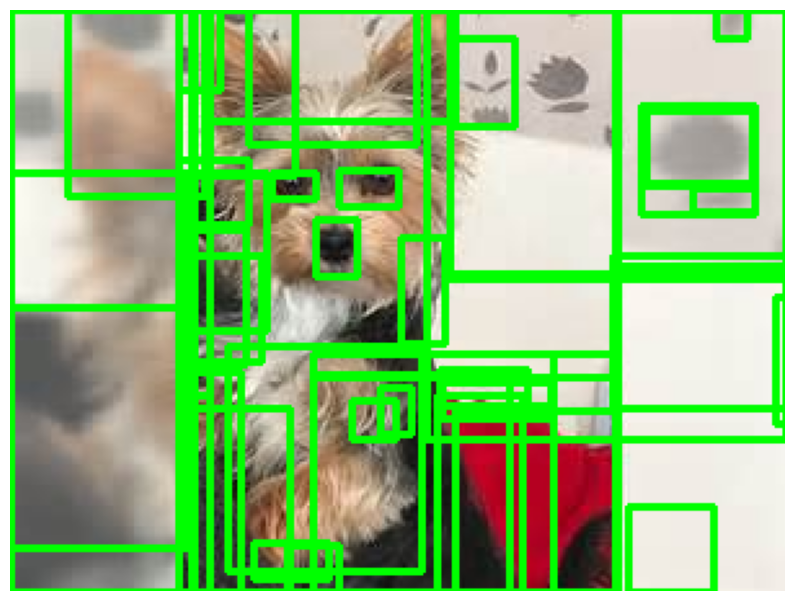

In [17]:
sample_img_path = '/Users/h383kim/pytorch/AlexNet/splitted/train/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg'
bboxes = selective_search(sample_img_path)
img = cv2.imread(sample_img_path, cv2.IMREAD_COLOR)
# Drawing the image and bounding boxes
for bbox in bboxes[:50]:
    x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
    img = cv2.rectangle(img, [x1, y1], [x2, y2], color=(0, 255, 0), thickness=2)
# BGR -> RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()